TAREA 4

In [1]:
import pandas as pd

##Acceso a los datos de manera remota

In [4]:
partidos_mundiales = pd.read_csv('https://raw.githubusercontent.com/cienciadedatos/datos-de-miercoles/master/datos/2019/2019-04-10/partidos.txt',delimiter='\t')
partidos_mundiales

,anio,anfitrion,estadio,ciudad,partido_orden,fecha,equipo_1,equipo_2,equipo_1_final,equipo_2_final
0,1930,Uruguay,Estadio Pocitos,Montevideo,(1),1930-07-13,Francia,Mexico,4,1
1,1930,Uruguay,Estadio Parque Central,Montevideo,(2),1930-07-13,Estados Unidos,Bélgica,3,0
2,1930,Uruguay,Estadio Parque Central,Montevideo,(3),1930-07-14,Yugoslavia,Brasil,2,1
3,1930,Uruguay,Estadio Pocitos,Montevideo,(4),1930-07-14,Rumania,Perú,3,1
4,1930,Uruguay,Estadio Parque Central,Montevideo,(5),1930-07-15,Argentina,Francia,1,0
...,...,...,...,...,...,...,...,...,...,...
895,2018,Rusia,Samara Arena,Samara (UTC+4),(60),2018-07-07,Suecia,Inglaterra,0,2
896,2018,Rusia,Saint Petersburg Stadium,St. Petersburg (UTC+3),(61),2018-07-10,Francia,Bélgica,1,0
897,2018,Rusia,Luzhniki Stadium,Moscow (UTC+3),(62),2018-07-11,Croacia,Inglaterra,2,1
898,2018,Rusia,Saint Petersburg Stadium,St. Petersburg (UTC+3),(63),2018-07-14,Bélgica,Inglaterra,2,0


In [7]:
#Reviso columnas de la base de datos
partidos_mundiales.columns

Index(['anio', 'anfitrion', 'estadio', 'ciudad', 'partido_orden', 'fecha',
       'equipo_1', 'equipo_2', 'equipo_1_final', 'equipo_2_final'],
      dtype='object')

In [19]:
#Eleccion de países para realizar comparaciones
#TOP 3 de selecciones con más mundiales
top_paises=['Italia','Brasil','Alemania']


In [27]:
#Comparación
partidos_top3= partidos_mundiales[(partidos_mundiales['equipo_1'].isin(['Italia','Brasil','Alemania'])) & (partidos_mundiales['equipo_2'].isin(['Italia','Brasil','Alemania']))]
partidos_top3

,anio,anfitrion,estadio,ciudad,partido_orden,fecha,equipo_1,equipo_2,equipo_1_final,equipo_2_final
50,1938,Francia,Stade Vélodrome,Marseille,(16),1938-06-16,Italia,Brasil,2,1
231,1970,Mexico,Estadio Azteca,Mexico City,(32),1970-06-21,Brasil,Italia,4,1
306,1978,Argentina,Estadio Monumental,Buenos Aires,(37),1978-06-24,Brasil,Italia,2,1
355,1982,España,Estadio Sarriá,Barcelona,(47),1982-07-05,Italia,Brasil,3,2
515,1994,Estados Unidos,Rose Bowl,Pasadena,(52),1994-07-17,Brasil,Italia,3,2
643,2002,Corea del sur y Japón,International Stadium Yokohama,Yokohama,(64),2002-06-30,Alemania,Brasil,0,2
704,2006,Alemania,Signal Iduna Park,Dortmund,(61),2006-07-04,Alemania,Italia,0,2
832,2014,Brasil,Estádio Mineirão,Belo Horizonte (UTC-3) # W57 - W58,(61),2014-07-08,Brasil,Alemania,1,7


In [33]:
#Conteo de goles en resultados finales
finalistas_1 = partidos_top3.groupby('equipo_1')['equipo_1_final'].sum()
finalistas_1

equipo_1
Alemania     0
Brasil      10
Italia       5
Name: equipo_1_final, dtype: int64

In [34]:
finalistas_2 = partidos_top3.groupby('equipo_2')['equipo_2_final'].sum()
finalistas_2

equipo_2
Alemania    7
Brasil      5
Italia      6
Name: equipo_2_final, dtype: int64

In [40]:
##Concateno datos para poder realizar una observación ordenada de los resultados en todos los partidos
goles = pd.concat([finalistas_1,finalistas_2])
goles.groupby(level=0).sum()
concat_goles= goles.sort_values(ascending=False)
print(concat_goles)

Brasil      10
Alemania     7
Italia       6
Italia       5
Brasil       5
Alemania     0
dtype: int64


In [67]:
##Total de goles
total_goles= finalistas_1.add(finalistas_2, fill_value=0)
goles = pd.DataFrame({'Pais':total_goles.index,'Anotaciones':total_goles.values})
print(goles)
goles

       Pais  Anotaciones
0  Alemania            7
1    Brasil           15
2    Italia           11


,Pais,Anotaciones
0,Alemania,7
1,Brasil,15
2,Italia,11


Gráfico 1

In [77]:
import matplotlib.pyplot as plt

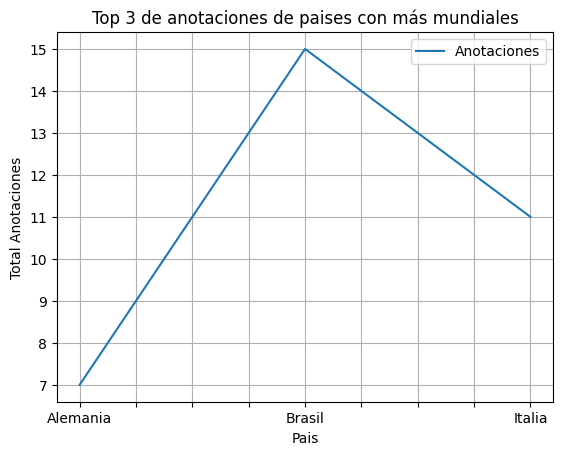

<Figure size 640x480 with 0 Axes>

In [78]:

goles.plot(x='Pais',y='Anotaciones')


plt.xlabel('País')
plt.ylabel('Total Anotaciones')
plt.title ('Top 3 de anotaciones de paises con más mundiales')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('gr1.png')
           
        

Gráfico 2

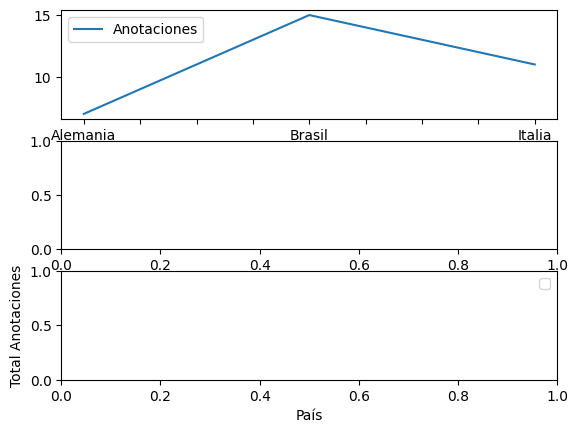

In [109]:
#Creamos un subplot
gr2 = plt.figure()
eje= gr2.add_subplot(3,1,1)
goles.plot(x='Pais',y='Anotaciones', ax= eje)
eje.set_xlabel('Pais')
eje2= gr2.add_subplot(3,1,2)
eje3= gr2.add_subplot(3,1,3)
plt.xlabel('País')
plt.ylabel('Total Anotaciones')
plt.legend()
#plt.title ('Top 3 de anotaciones de paises con más mundiales')
plt.savefig('gr2.png')